# EDA

### Importamos Librerias necesarias

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

Cargamos el csv, hacemos un paneo general de la informacion, como se ve la tabla que fue previamente transformada para verificar su Memory Usage y describe para hacer un rapido chequeo sobre las variables numericas de nuestro dataset

In [2]:
df = pd.read_csv('df_final.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52707 entries, 0 to 52706
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      52707 non-null  object 
 1   id                         52707 non-null  int64  
 2   Action                     52707 non-null  int64  
 3   Adventure                  52707 non-null  int64  
 4   Animation &amp; Modeling   52707 non-null  int64  
 5   Audio Production           52707 non-null  int64  
 6   Casual                     52707 non-null  int64  
 7   Design &amp; Illustration  52707 non-null  int64  
 8   Early Access               52707 non-null  int64  
 9   Education                  52707 non-null  int64  
 10  Free to Play               52707 non-null  int64  
 11  Indie                      52707 non-null  int64  
 12  Massively Multiplayer      52707 non-null  int64  
 13  Photo Editing              52707 non-null  int

In [12]:
df['user_id'].head(40)

0               kube134
1     76561198030567998
2     76561198030567998
3     76561198030567998
4     76561198030567998
5     76561198030567998
6            jonasdbomb
7           washington_
8           washington_
9           washington_
10          washington_
11          washington_
12          washington_
13               Mastic
14               Mastic
15               Mastic
16               Mastic
17               Mastic
18               Mastic
19           advenger95
20           advenger95
21           advenger95
22    76561198003056556
23    76561198003056556
24    76561198085956238
25    76561198085956238
26    76561198085956238
27    76561198085956238
28           uradumbtit
29           uradumbtit
30    76561198020928326
31    76561198020928326
32    76561198020928326
33    76561198020928326
34            scroopy22
35            auzzie_96
36    76561198035363871
37              CHAAANG
38              CHAAANG
39    76561198084718144
Name: user_id, dtype: object

In [83]:
#Primer vistazo general a la data
df.head(2)

,title,id,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,...,user_url,funny,last_edited,item_id,helpful,recommend,review,posted year,sentiment_score,processed_review
0,Half-Life,70,1,0,0,0,0,0,0,0,...,http://steamcommunity.com/id/kube134,NaN,NaN,251990.0,1 of 1 people (100%) found this review helpful,True,It's good to be a magical queen... if you surv...,2014.0,0,it good to be magical queen if you survive to ...
1,Half-Life,70,1,0,0,0,0,0,0,0,...,http://steamcommunity.com/profiles/76561198030...,2 people found this review funny,NaN,332800.0,194 of 282 people (69%) found this review helpful,True,10/10 would take kids here for birthday,2014.0,0,would take kids here for birthday


Para intentar ver una mejor interpretacion, quitare las columnas categoricas de mi dataset para realizar un heatmap

In [75]:
#Creamos una lista con solo las variables numéricas
df_num= df.select_dtypes(include = (int,float))
df_num.drop(columns=['Action', 'Adventure',
       'Audio Production', 'Casual', 'Design &amp; Illustration',
       'Early Access', 'Education', 'Free to Play', 'Indie', 'Animation &amp; Modeling',
       'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
       'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing'], inplace=True)

In [10]:
df.columns

Index(['title', 'id', 'Action', 'Adventure', 'Animation &amp; Modeling',
       'Audio Production', 'Casual', 'Design &amp; Illustration',
       'Early Access', 'Education', 'Free to Play', 'Indie',
       'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
       'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing', 'year', 'user_id', 'items_count',
       'steam_id', 'playtime_forever', 'playtime_2weeks', 'user_url', 'funny',
       'last_edited', 'item_id', 'helpful', 'recommend', 'review',
       'posted year', 'sentiment_score'],
      dtype='object')

In [78]:
#Creamos un describe para un analisis rápido de la data. Una de estas columnas se descarta a dar información inútil(id)
df_num.describe()

,id,year,items_count,steam_id,playtime_forever,playtime_2weeks,item_id,posted year,sentiment_score
count,52707.000000,52707.000000,52707.000000,5.270700e+04,52707.000000,52707.000000,52682.000000,43522.000000,52707.000000
mean,5963.007418,2004.799628,146.406132,7.656120e+16,4638.936289,23.420039,170817.665066,2014.155508,0.327034
std,25881.730852,2.953082,233.530828,3.839649e+07,13890.877307,209.629254,132090.477195,0.843346,0.739334
min,10.000000,1990.000000,1.000000,7.656120e+16,0.000000,0.000000,10.000000,2010.000000,0.000000
25%,220.000000,2004.000000,55.000000,7.656120e+16,82.000000,0.000000,9480.000000,2014.000000,0.000000
50%,320.000000,2005.000000,95.000000,7.656120e+16,559.000000,0.000000,218230.000000,2014.000000,0.000000
75%,4000.000000,2006.000000,167.000000,7.656120e+16,2751.000000,0.000000,263020.000000,2015.000000,0.000000
max,339610.000000,2017.000000,7762.000000,7.656120e+16,356217.000000,9089.000000,527340.000000,2015.000000,2.000000


## Mapa de correlacion
Intentare a continuacion realizar un heatmap, buscando algun tipo de relacion directa entre las variables numericas

<Axes: >

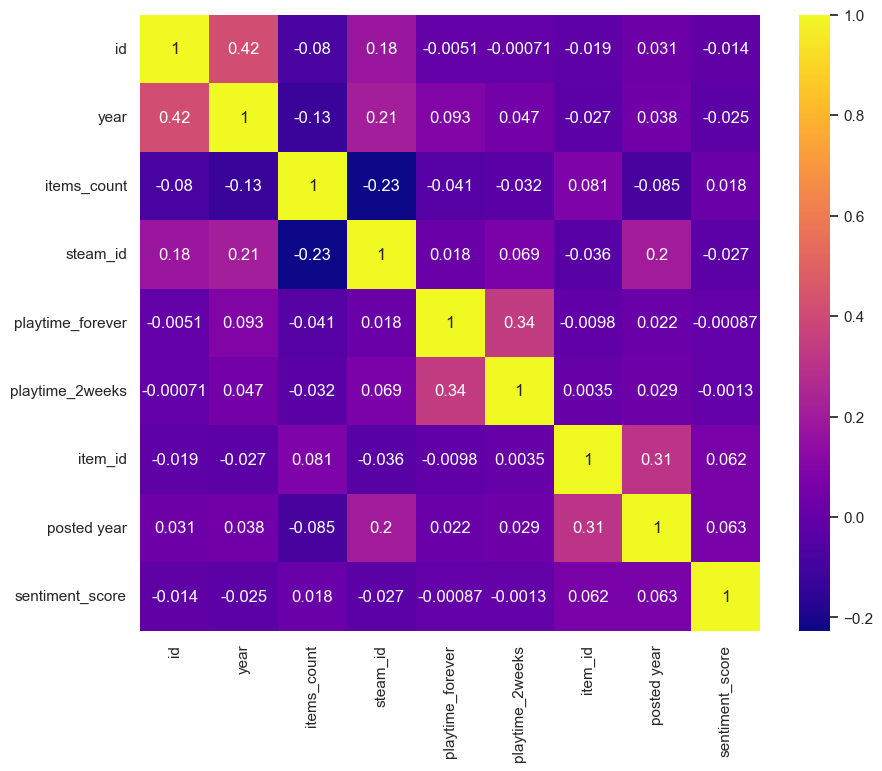

In [79]:
#Creamos una matriz de correlación
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='plasma')

Conclusiones: no hay realmente una correlacion entre los elementos, cada columna pertenece a su propia categoria

## Top juegos
El top de juegos con reviews entre usuarios de nuestro dataset

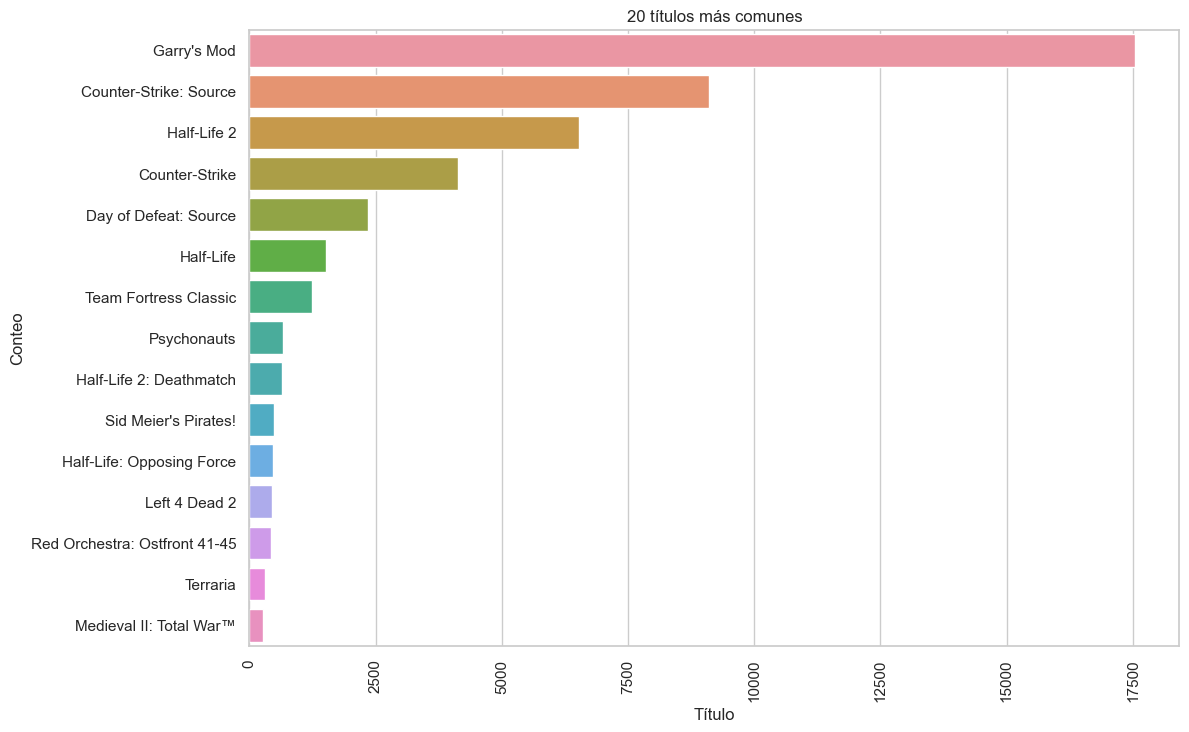

In [98]:
# Obtener los 20 títulos más comunes
top_titles = df['title'].value_counts().nlargest(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.xlabel('Título')
plt.ylabel('Conteo')
plt.title('20 títulos más comunes')
plt.xticks(rotation=90)
plt.show()

Concluciones: El mayor porcentaje lo tienen Garry's Mod, Counter Strike, Half-Life 2, los cuales serian
los juegos mas comprados segun los usuarios

## Nube de palabras mas frecuentes en los titulos
La idea es hacer un paneo de las palabras mas utilizadas en los reviews de usuarios de steam, talvez indicando alguna categorizacion positiva o negativa

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\W10-PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


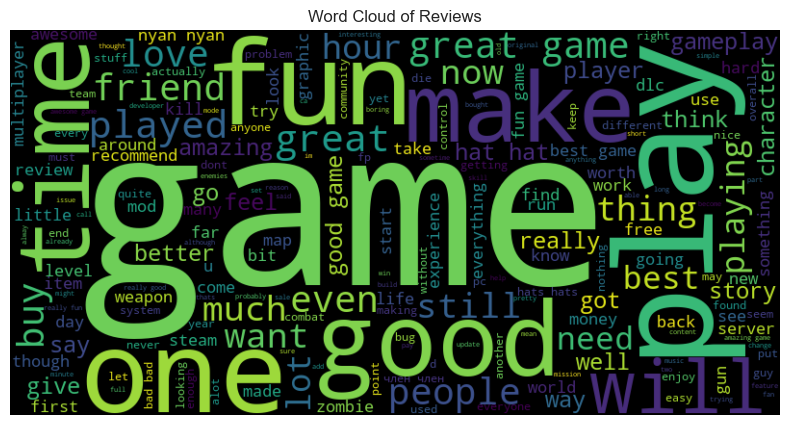

In [81]:
nltk.download('stopwords')
def preprocess_text(text):
    if pd.isnull(text):
        return ''
    stopwords = nltk.corpus.stopwords.words('spanish')
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords]
    return ' '.join(tokens)
df['processed_review'] = df['review'].apply(preprocess_text)
all_reviews = ' '.join(df['processed_review'])


wordcloud = WordCloud(width=800, height=400).generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

## Dispersion de horas de juego vs Años
un chequeo general para mostrar explicitamente los años que tuvieron la mayor cantidad de horas de juego para cada usuario

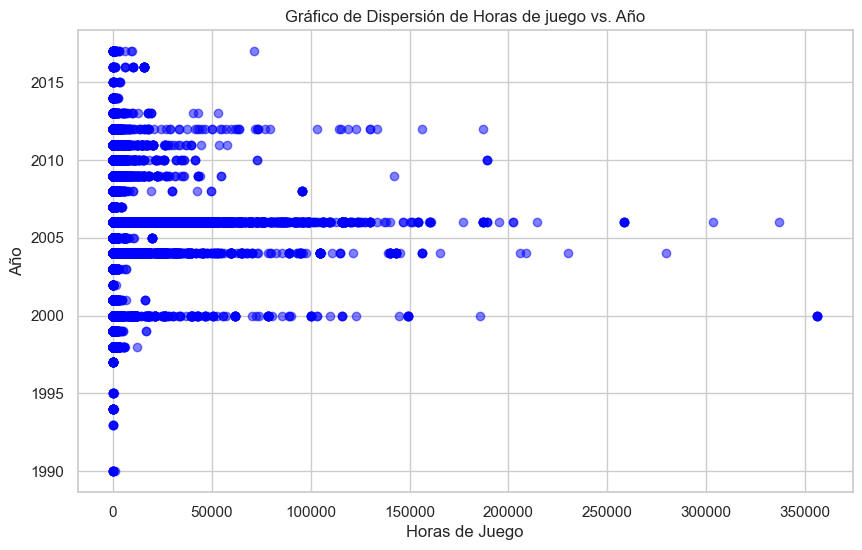

In [85]:
plt.figure(figsize=(10, 6))

# Crea el scatter plot de playtime vs. price
plt.scatter(df_num['playtime_forever'], df_num['year'], color='blue', alpha=0.5)

# Personaliza el gráfico con etiquetas y título
plt.title('Gráfico de Dispersión de Horas de juego vs. Año')
plt.xlabel('Horas de Juego')
plt.ylabel('Año');

## Horas de juego por categoria en cada año

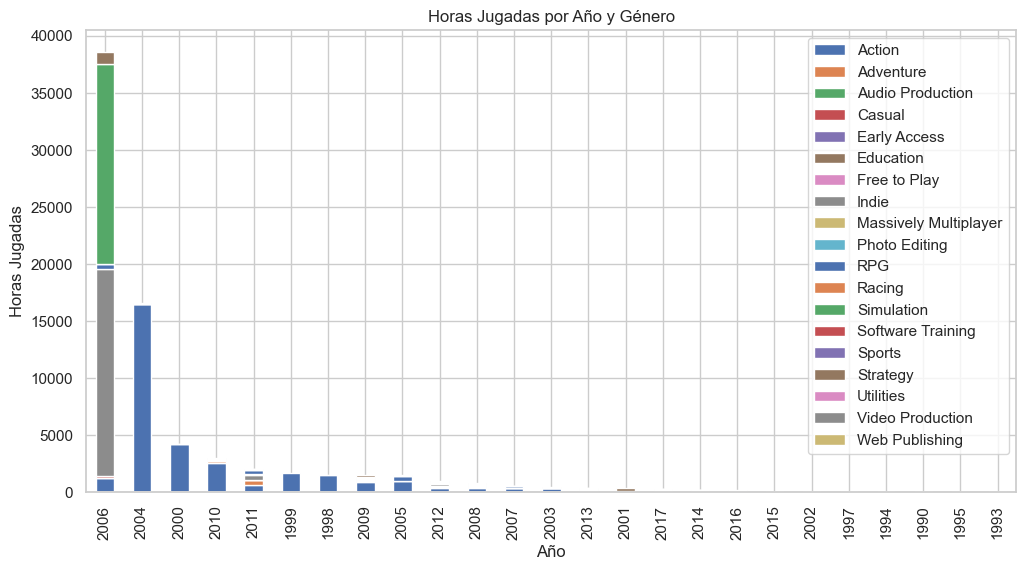

In [96]:
genres = ['Action', 'Adventure', 'Audio Production', 'Casual',
             'Early Access', 'Education', 'Free to Play', 'Indie',
             'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
             'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing']

relevant_columns = ['year', 'playtime_forever'] + genres
df_filtered = df[relevant_columns].copy()

df_grouped = df_filtered.groupby('year')[genres].sum()
df_grouped['total_playtime'] = df_grouped[genres].sum(axis=1)
df_grouped = df_grouped.sort_values('total_playtime', ascending=False)
df_filtered = df[(df['year'] >= 2001) & (df['year'] <= 2006)][relevant_columns].copy()

df_grouped[genres].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Año')
plt.ylabel('Horas Jugadas')
plt.title('Horas Jugadas por Año y Género')
plt.legend(loc='upper right')
plt.show()

- Concluciones: 2006 es al parecer el año con mayor cantidad de horas registradas, los dos generos mas jugados fueron: Indie y Simulacion, seguido de Accion

### Sentient Score por año

demostracion de la aplicacion en conteo por año de posteo de review

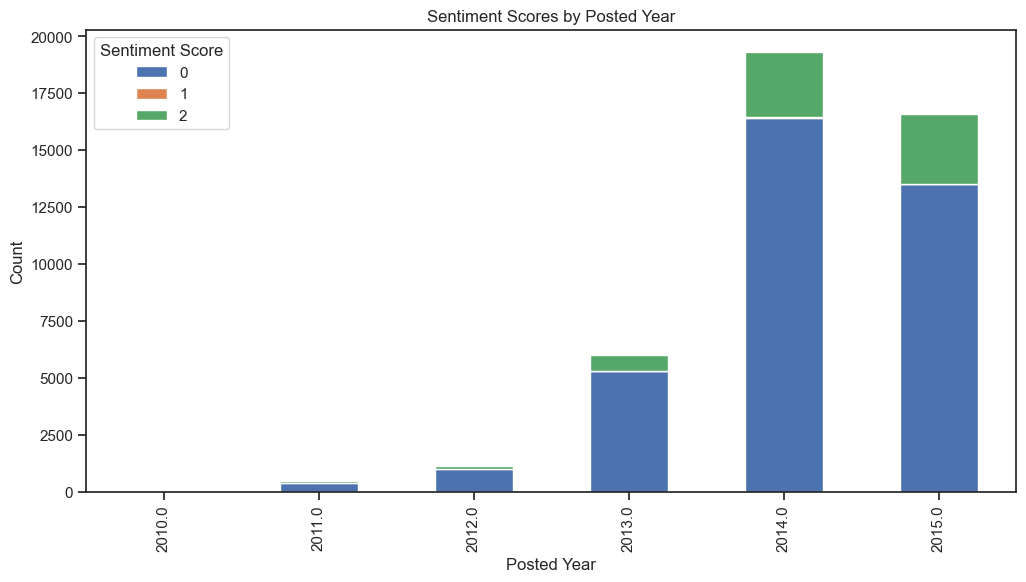

In [102]:
# Group the data by 'posted year' and 'sentiment_score' and count the occurrences
grouped_data = df.groupby(['posted year', 'sentiment_score']).size().reset_index(name='count')

# Pivot the data to have 'sentiment_score' as columns
pivot_data = grouped_data.pivot(index='posted year', columns='sentiment_score', values='count')

# Plot the grouped data
sns.set(style='ticks')
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Posted Year')
plt.ylabel('Count')
plt.title('Sentiment Scores by Posted Year')
plt.legend(title='Sentiment Score', loc='upper left')
plt.show()

- Conclucion: Al aplicar un sentiment score a nuestros reviews, indica mayoria de reviews positivos mayormente en los años 2014  y 2015. Al aplicar nuestra funcion de categorizacion tenemos muy pocas variables neutrales las cuales no se llegan a apreciar en el grafico